Saving istockphoto-507995592-612x612.jpg to istockphoto-507995592-612x612 (2).jpg


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


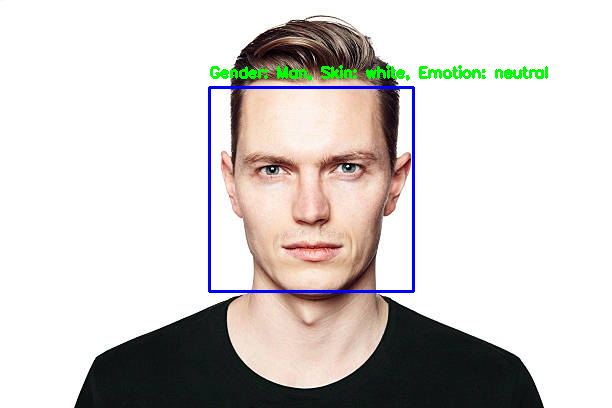

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import cv2
import numpy as np
from deepface import DeepFace
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt


uploaded = files.upload()
image_path = list(uploaded.keys())[0]


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def analyze_face(image_path):
    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        try:
            analysis = DeepFace.analyze(face, actions=['gender', 'race', 'emotion'], enforce_detection=False)

            gender = analysis[0]['dominant_gender']
            skin_tone = analysis[0]['dominant_race']
            emotion = analysis[0]['dominant_emotion']

            label = f"Gender: {gender}, Skin: {skin_tone}, Emotion: {emotion}"
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        except Exception as e:
            print(f"Error analyzing face: {e}")

    return frame


processed_frame = analyze_face(image_path)


cv2_imshow(processed_frame)


result_path = "processed_image.jpg"
cv2.imwrite(result_path, processed_frame)
files.download(result_path)
